## Stock Price Prediction Model

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



from copy import copy

In [2]:
df = pd.read_csv(r"D:\ALL Projects\1ML\Stock_Price_Prediction\stocks_dataset.csv")
df.head()

,Date,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
0,11/7/2013,47.560001,44.900002,46.694286,131.509995,35.110001,18.580000,139.770004,1747.150024
1,11/8/2013,47.529999,41.650002,47.842857,133.490005,35.169998,19.090000,137.949997,1770.609985
2,11/11/2013,46.200001,42.900002,48.272858,132.529999,35.029999,19.200001,144.699997,1771.890015
3,11/12/2013,46.610001,41.900002,47.675713,132.330002,35.169998,19.260000,137.800003,1767.689941
4,11/13/2013,48.709999,42.599998,47.897144,133.169998,35.070000,19.700001,138.699997,1782.000000


| Column    | Description                                                              |
| --------- | ------------------------------------------------------------------------ |
| **Date**  | The trading date (string format right now — should convert to datetime). |
| **FB**    | Facebook (Meta) stock closing price.                                     |
| **TWTR**  | Twitter closing price.                                                   |
| **NFLX**  | Netflix closing price.                                                   |
| **BA**    | Boeing closing price.                                                    |
| **T**     | AT&T closing price.                                                      |
| **MGM**   | MGM Resorts closing price.                                               |
| **TSLA**  | Tesla closing price.                                                     |
| **sp500** | S&P 500 index closing value (market benchmark).                          |


In [3]:
## data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1699 non-null   object 
 1   FB      1699 non-null   float64
 2   TWTR    1699 non-null   float64
 3   NFLX    1699 non-null   float64
 4   BA      1699 non-null   float64
 5   T       1699 non-null   float64
 6   MGM     1699 non-null   float64
 7   TSLA    1699 non-null   float64
 8   sp500   1699 non-null   float64
dtypes: float64(8), object(1)
memory usage: 119.6+ KB


In [4]:
# describe the data
df.describe()

,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
count,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000
mean,135.966863,31.296698,195.423654,218.325633,35.296986,25.720865,311.299388,2413.219428
std,50.062473,11.508628,127.700712,98.968191,3.412142,5.200605,203.097452,424.825240
min,44.820000,14.010000,44.887142,95.010002,26.770000,7.140000,120.500000,1741.890015
25%,88.080002,19.600001,90.474998,132.840004,32.790001,21.935001,218.829994,2053.294921
50%,136.759995,31.610001,143.830002,158.289993,34.900002,25.879999,253.740005,2360.159912
75%,178.075005,38.229999,320.024993,334.360001,38.004999,29.250000,323.565002,2783.330078
max,268.440002,73.309998,548.729980,440.619995,43.470001,38.029999,1643.000000,3386.149902


| Stock              | Mean (Average $) | Std (Volatility) | Min → Max         | Interpretation                                                                          |
| ------------------ | ---------------- | ---------------- | ----------------- | --------------------------------------------------------------------------------------- |
| **FB (Meta)**      | 135.97           | 50.06            | 44.82 → 268.44    | Moderate growth, medium volatility.                                                     |
| **TWTR (Twitter)** | 31.30            | 11.51            | 14.01 → 73.31     | Stayed relatively low, some spikes but not huge.                                        |
| **NFLX (Netflix)** | 195.42           | 127.70           | 44.89 → 548.73    | High volatility — price fluctuates a lot.                                               |
| **BA (Boeing)**    | 218.33           | 98.97            | 95.01 → 440.62    | Also very volatile — likely affected by global events (e.g., 737 MAX issues, pandemic). |
| **T (AT&T)**       | 35.30            | 3.41             | 26.77 → 43.47     | Very stable — low-risk, low-volatility telecom stock.                                   |
| **MGM**            | 25.72            | 5.20             | 7.14 → 38.03      | Moderate volatility — sensitive to travel/tourism cycles.                               |
| **TSLA (Tesla)**   | 311.30           | 203.10           | 120.5 → 1643.0    | Extremely volatile — massive growth potential but high risk.                            |
| **S&P 500**        | 2413.22          | 424.83           | 1741.89 → 3386.15 | Represents overall market trend — generally upward movement.                            |


Note : Tesla and Netflix are high-risk, high-reward stocks.
AT&T is very stable, more like a defensive or dividend stock.

# Data Preprocessing

In [5]:
# Function to normalize data ---> initial / first price  -----> To Remove Scale Differences
def normalize_data(data):
    normal = data.copy()
    for col in normal.columns:
        normal[col] = normal[col] / normal[col].iloc[0]
        
    return normal

In [6]:
normalize_data(df.set_index('Date'))

,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
Date,,,,,,,,
11/7/2013,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
11/8/2013,0.999369,0.927617,1.024598,1.015056,1.001709,1.027449,0.986979,1.013428
11/11/2013,0.971405,0.955457,1.033807,1.007756,0.997721,1.033369,1.035272,1.014160
11/12/2013,0.980025,0.933185,1.021018,1.006235,1.001709,1.036598,0.985905,1.011756
11/13/2013,1.024180,0.948775,1.025760,1.012623,0.998861,1.060280,0.992345,1.019947
...,...,...,...,...,...,...,...,...
8/3/2020,5.297729,0.810468,10.678394,1.233899,0.843634,0.878364,10.624597,1.885705
8/4/2020,5.252944,0.809577,10.914398,1.255190,0.854742,0.899892,10.638906,1.892516
8/5/2020,5.238015,0.819376,10.753136,1.325222,0.850185,0.899892,10.624740,1.904685


## Data Visualization

In [7]:
def plot_normalized_data(normalized_data):
    plt.figure(figsize=(15, 8))
    for column in normalized_data.columns:
        plt.plot(normalized_data.index, normalized_data[column], label=column)
    plt.xlabel('Date')
    plt.ylabel(' Price')
    plt.title('Stock Prices Over Time')
    plt.legend()
    plt.show()

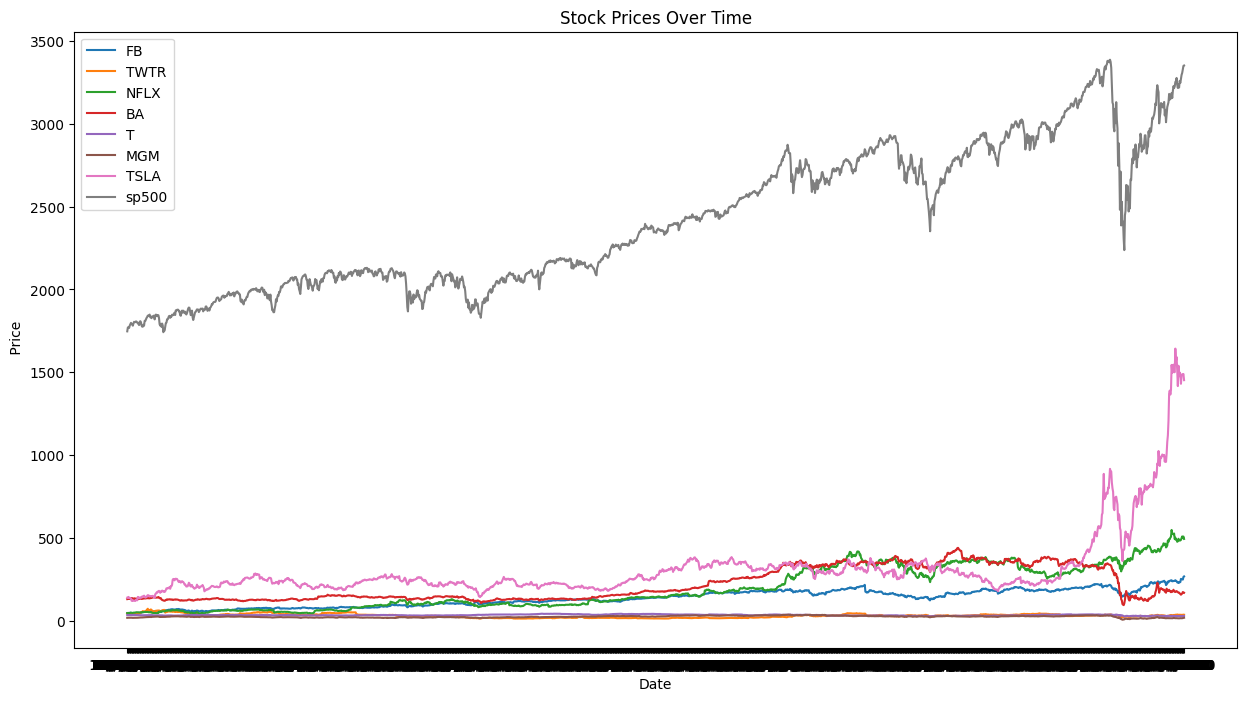

In [8]:
# check data distribution before normalization
plot_normalized_data(df.set_index('Date'))

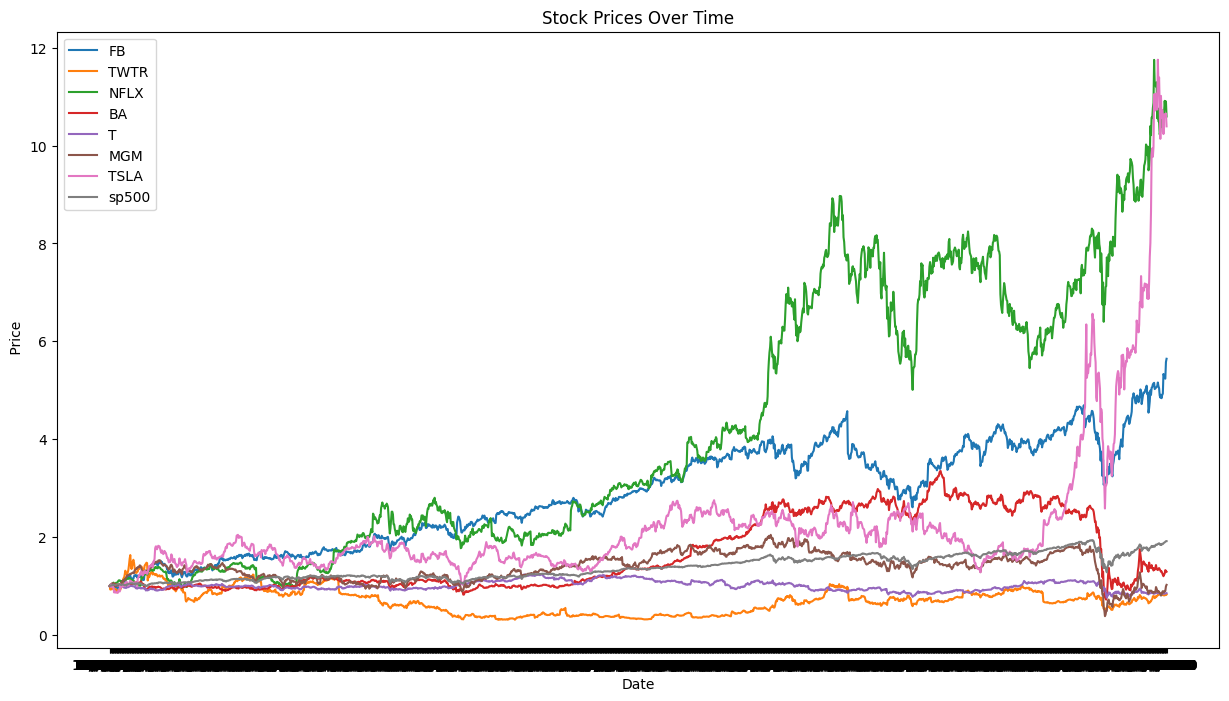

In [9]:
# check data distribution after normalization
plot_normalized_data(normalize_data(df.set_index('Date')))

Calculate daily return:

Daily Return (%)
=
((Today Price
−
Yesterday Price)
/
Yesterday Price)
×
100


In [10]:
import numpy as np
import pandas as pd

def calculate_daily_returns(data):
    # Make a copy to avoid modifying original
    df_returns = data.copy()
    
    # Select only numeric columns (ignore Date)
    numeric_cols = df_returns.select_dtypes(include=[np.number]).columns
    
    # Calculate daily returns using vectorized pct_change
    df_returns[numeric_cols] = df_returns[numeric_cols].pct_change() * 100
    
    # Set first row to 0 (no previous day)
    df_returns.loc[0, numeric_cols] = 0
    
    return df_returns


In [11]:
stock_daily_returns = calculate_daily_returns(df)
stock_daily_returns.head()

,Date,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
0,11/7/2013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,11/8/2013,-0.063082,-7.238307,2.459768,1.505597,0.170883,2.744887,-1.302144,1.342756
2,11/11/2013,-2.798229,3.001200,0.898778,-0.719159,-0.398064,0.576223,4.893077,0.072293
3,11/12/2013,0.887446,-2.331002,-1.237020,-0.150907,0.399655,0.312495,-4.768482,-0.237039
4,11/13/2013,4.505467,1.670635,0.464452,0.634774,-0.284328,2.284533,0.653116,0.809534


## Calculaty Beta for Tesla Stock

<Axes: xlabel='sp500', ylabel='TSLA'>

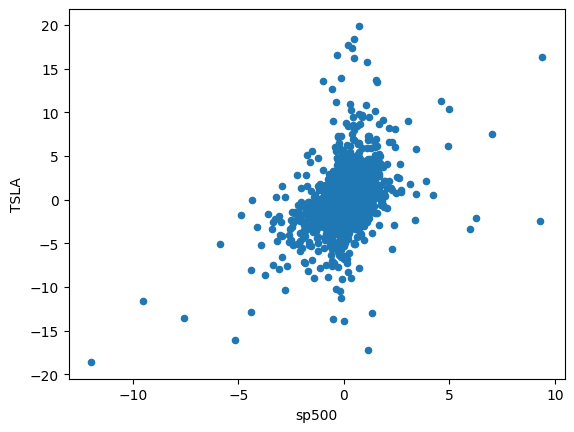

In [12]:
# plot a scatter plot between the Tesla and the S&P500 (Market)
stock_daily_returns.plot(kind = 'scatter', x = 'sp500', y = 'TSLA')

In [13]:
# Fit a polynomial between the selected stock and the S&P500 

# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets 

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market. 
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. 
# Tech stocks generally have higher betas than S&P500 but they also have excess returns


beta, alpha = np.polyfit(stock_daily_returns['sp500'], stock_daily_returns['TSLA'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('TSLA', beta, alpha))  

Beta for TSLA stock is = 1.2359723602006571 and alpha is = 0.13716200993236893
